
<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC295: Advanced Practical Data Science </h1>

## Lecture 4:  Dask

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Pavlos Protopapas <br>
**Author**: Andrea Porelli and Pavlos Protopapas


<hr style='height:2px'>



# Table of Contents
* [Lecture 4: Dask](#Lecture-4:-Dask)
    * [Part 1: Scalable computing](#Part-1:-Scalable-computing)
        * [1.1 Dask API](#1.1-Dask-API)
        * [1.2 Directed acyclical graph (DAGs)](#1.2-Directed-acyclical-graph-(DAGs))
        * [1.3 Review Part 1](#1.3-Review-Part-1)
    * [Part 2: Introduction to DASK](#Part-2:-Introduction-to-DASK)
        * [2.1 Exploratory data analysis with DASK](#2.1-Exploratory-data-analysis-with-DASK)
        * [2.2 Visualize directed acyclic graphs (DAGs)](#2.2-Visualize-directed-acyclic-graphs-(DAGs))
        * [2.3 Task scheduling](#2.3-Task-scheduling)
        * [2.4 Review Part 2](#2.4-Review-Part-2)
    * [Part 3: Exercise with DASK](#Part-3:-Exercise-with-DASK)
        *  [3.1 Learn how to Manipulate Structured Data](#3.1-Learn-how-to-manipulate-structured-data)
        *  [3.2 Summary part 3 and Dask limitations](#3.2-Summary-part-3-and-dask-limitations)

## Part 1: Scalable computing

### 1.1 Dask API

- what makes it unique: 
    - allows to work with larger datasets making it possible to parallelize computation
    - it is helpful when size increases and even when "simple" sorting and aggregating would otherwise spill on persistent memory
    - it simplifies the cost of using more complex infrastructure
    - it is easy to learn for data scientists with a background in the Python (similar syntax) and flexible 
    - it helps applying distributed computing to data science project:
        - not of great help for small size datasets: complex operations can be done without spilling to disk and slowing down process. Actually it would generate greater overheads.
        - very useful for medium size dataset; it allows to work with medium size in local machine. Python was not designed to make sharing work between processes on multicore systems particularly easy. As a result, it can be difficult to take advantage of parallelism within Pandas.
        - essential for large datasets: Pandas, NumPy, and scikit-learn are not suitable at all for datasets of this size, because they were not inherently built to operate on distributed datasets. This provide help for using libraries
    
    
| Dataset type | Size range | Fits in RAM? | Fits on local disk? |
|:---:|:---:|:---:|:---:|
| Small dataset | Less than 2–4 GB |Yes|Yes|
| Medium dataset | Less than 2 TB |No|Yes|
| Large dataset | Greater than 2 TB |No|No|

Adapted from **Data Science with Python and Dask**

- Dask consists of several different components and APIs, which can be categorized into three layers: 
    - the scheduler: add_definition/explanation;
    - low-level APIs: add_definition/explanation; 
    - and high-level APIs: add_definition/explanation .

<img src=IMG/Dask_components___layers.PNG width="480">
<br>
Adapted from **Data Science with Python and Dask**


### 1.2 Directed acyclical graph (DAGs)

**graph**: is a representation of a set of objects that have a relationship with one another >>> good to represent a wide variety of information. A graph is compounded by:
    - *node*: a function, an object or an action 
    - *line*: symbolizes the relationship among nodes
    
**directed acyclical graph**: there is one logical way to traverse the graph. No node is visited twice.

**cyclical graph**: exists a feedback loop that allow to revisit and repeat the actions within the same node.

**handle computational resources**: as the problem we solve requires more resources we have two options:

    -*scale up*: increase size of the available resource. invest in more efficient technology, cons diminishing returns
    -*scale out*: add other resources (dask main idea). invest in more cheap resources, cons distribute workload

**concurrency**: as we approach greater number of "work to be completed", some resources might be not fully exploited. For instance some might be idling because of insufficient shared resources  _(i.e. resource starvation)_. Schedulers handle this issue making sure to provide sufficient resources to each worker.

**failures**:
    - work failures: a worker leave, and you know have to assign another one to his task. This might potentially slowing down the execution, however it won't affect previous work (aka data loss)
    - data loss: some accident happens and you have to start from the beginning. The scheduler stop and restart from the beginning the whole process.




### 1.3 Review Part 1

- Dask can be used to scale popular Python libraries such as Pandas and NumPy allowing to analyse dataset with greater size (>8GB)
- Dask uses directed acyclical graph to coordinate execution of parallelized code across processors
- Directed acyclical graph are made up of nodes, clearly defined start and end that can be transverse in only one logical way (no looping).
- Upstream actions are completed before downstream nodes.
- Scaling out (i.e. add workers) can improve performances of complex workloads, however create overhead that can reduces gains.
- In case of failure, the step to reach a node can be repeated from the beginning without disturbing the rest of the process.

## Part 2: Introduction to DASK

- Warm up with short example of data cleaning using Dask _DataFrames_
- Visualize Directed Acyclical Graph generated by Dask workloads with graphviz
- Explore how the scheduler applies the DAGs to coordinate execution code
- You will learn:
    - Dask DataFrame API
    - Use diagnostic tool
    - Use low-level Delayed API to create custom graph

### 2.1 Exploratory data analysis with DASK
- Set up environment and working directory
- Load data
- Check data quality issue (e.g. missing values and outliers)
- Drop columns (not useful for analysis AKA missing many values)

#### 2.1.1 Set up environment and working directory

In [1]:
# import libraries
import sys
import os

## import dask libraries
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# import libraries
import pandas as pd

In [3]:
# assign working directory [CHANGE THIS]. It can not fit in github so I have it locally. Download files 
os.chdir('/nyc-parking-tickets')
cwd = os.getcwd()

# print 
print('<enviroment path>', sys.executable)
print('<current working directory>', cwd)

<enviroment path> /Users/haibui/.pyenv/versions/3.7.7/bin/python3.7
<current working directory> /Users/haibui/00_MIT_Harvard_CS_DS/harvard_data_science/daskdemo/notebook/nyc-parking-tickets


#### 2.1.2 Load data

In [4]:
## read data using DataFrame API
df = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=33,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,int64,object,object,object,int64,int64,int64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,int64,object,int64,object,object,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**note that**
- _metadata_ are shown in the frame instead of data sample
- _syntax_ is pretty similar to Pandas API
- _# partitions_  is the number of splits used to separate the main dataset. The optimal number is decided by the scheduler that split Pandas DataFrame into smaller chuncks. In this case each partitions is ~64MB (i.e. Dataset size/npartitions = 2GB/33). If we have one worker, Dask will cycle to each partition one at time.
- _data types_ are reported under each column name (similary to describe method in Pandas, however performed through random sampling because data scattered across multiple physical machines). Good practice is to explicit data types instead relying on Dask's inference (store in binary format ideally, see links to Write and Read Parquet).
- _Dask Name_ reports the name of the DAG (i.e. from-delayed)
- _# tasks_ is the number of nodes in the DAG. You can think of a task as a Python function and in this case each partition operates 3 tasks: 1) reading the raw data, 2) splitting the data in appropriate blocks and, 3) initialazing the DataFrame object. Every task comes with some overhead (between 200us and 1ms). 

<img src=IMG/dask_partitions.PNG width="480">
<br>

Partition process from **Data Science with Python and Dask**

#### Want to know more?
- [Best Practices](https://docs.dask.org/en/latest/best-practices.html)
- [Write and Read Parquet](https://examples.dask.org/dataframes/01-data-access.html)

#### 2.1.3 Check data quality issue

In [5]:
# count missing values
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
dtype: int64
Dask Name: dataframe-sum-agg, 100 tasks

**note that**
- _dask object_ created is a series containing _metadata_ and _syntax_ is pretty similar to Pandas API
- _processing hasn't be completed_ yet, instead Dask prepared a DAG stored in the missing values variable (advantage of building graph quickly without need to wait for computation)
- _# tasks_ increased because have been added 2 tasks (i.e. check missing values and sum) for each of the 33 partitions as well as a final addition to aggregate the results among all the partitions for a total of 166 = [(66+1)+99]

In [6]:
# calculate percent missing values
mysize = df.index.size
missing_count = ((missing_values / mysize) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
dtype: float64
Dask Name: mul, 169 tasks

**note that**

- _dask object_ created is a series and computation hasn't be completed yet
- _df.index.size_ is a dask object _dask.dataframe.core.Scalar_ . You cannot access its value/lenght directely like you would do with a list (e.g. len()). It would go against the whole idea of dask (i.e. read all the dataset)
- _# tasks_ increased because have been added 2 tasks (i.e. division and multiplication)
- _data type_ ahs changed from int64 to float64. Dask automatically converted it once the datatype at the output might not match the input after the division

In [8]:
# run computations using compute method
with ProgressBar():
    missing_count_percent = missing_count.compute()
missing_count_percent

[##################################      ] | 86% Completed | 56.3s

/Users/haibui/.pyenv/versions/3.7.7/lib/python3.7/multiprocessing/pool.py:121: DtypeWarning: Columns (18,38) have mixed types.Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


[########################################] | 100% Completed | 59.5s


Summons Number                         0.000000
Plate ID                               0.006739
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.395361
Vehicle Make                           0.676199
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    19.183510
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        19.093212
Issuer Squad                          19.101506
Violation Time                         0.000583
Time First Observed                   92

**note that**

- _.compute() method_ is necessary to run the actions embedded in each node of the DAG
- The _results_ of the compute method are stored into a Pandas Series
- _ProgressBar()_ is a wrapper to keep track of running tasks. It shows completed work
- _from a quick visual inspection_ we can see that are columns that are incomplete and we should drop

#### 2.1.4 Drop columns

In [9]:
# filter sparse columns(greater than 60% missing values) and store them
columns_to_drop = missing_count_percent[missing_count_percent > 60].index
print(columns_to_drop)

# drop sparse columns
with ProgressBar():
    #df_dropped = df.drop(columns_to_drop, axis=1).persist()
    df_dropped = df.drop(columns_to_drop, axis=1).compute()

Index(['Time First Observed', 'Intersecting Street', 'Violation Legal Code',
       'Unregistered Vehicle?', 'Meter Number',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')
[#####################################   ] | 93% Completed |  1min  5.2s

/Users/haibui/.pyenv/versions/3.7.7/lib/python3.7/site-packages/dask/core.py:121: DtypeWarning: Columns (18,38) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


[########################################] | 100% Completed |  1min  6.2s


**note that**

- _use Pandas Series_ to drop columns in Dask DataFrames because each partition is a Pandas DataFrame
- In the case the Series is made available to all threads, in a cluster it would be serialized and brodcast to all the worker nodes
- _.persit() method_ allows to store in memory intermediate computations so they can be reused.

### 2.2  Visualize directed acyclic graphs (DAGs)

- DASK uses graphviz library to generate visual representation of the DAGs created by the scheduler
- Use .visualize() metod to inspect the DAGs of DataFrames, Series, Bag, and arrays 
- For simplicity we will use Dask Delayed object instead of DataFrames since they grow quite large and hard to visualize
- _delayed_ is a constructor that allows to wrap functions and create Dask Delayed objects that are equivalent to a node in a DAG. By chaining together delayed object, you create the DAG
- Below are two examples, in the first one you build a DAG with one node only with dependencies and in the second one you build another with multiple nodes with dependencies

#### 2.2.1 Example 1: DAG with one node with depenndecy

In [16]:
# import library
import dask.delayed as delayed

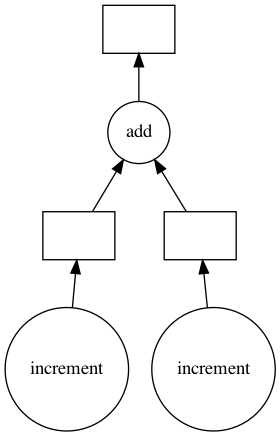

In [17]:
def increment(i):
    return i + 1

def add(x, y):
    return x + y

# wrap functions within dealyed object and chain
x = delayed(increment)(1)
y = delayed(increment)(2)
z = delayed(add)(x, y)

# visualize the DAG
z.visualize()

In [18]:
# show the result
z.compute()

5

**note that**
- _to build a node_ wrap the function with the delayed object and then pass the arguments of the function. You could also use a decoretors (see documentation).
- _circles_ symbolize function and computations while _squares_ intermediate or final result
- _incoming arrows_ represent dependecies. The _increment_ function do not have any dependency while _add_ function has two. Thus, add function has to wait until objects x and y have been calculated
- functions without dependencies can be computed independentely and a worker can be assigned to each one of them
- _use method .visualize()_ on the last node with dependencies to peak at the DAG 
- _Dask does not compute the DAG_ . Use the method .compute() on the last node to see the result

#### 2.2.2  Example 1: DAG with more than one node with dependencies

- we are going to build a more complex DAG with two layers:
    - layer1 is built by looping over a list of data using a list comprehension to create dask delayed objects as "leaves" node. This layer combine the previously created function increment with the values in the list, then use the built in function sum to combine the results;
    - layer2 is built looping on each object created in layer1 and 

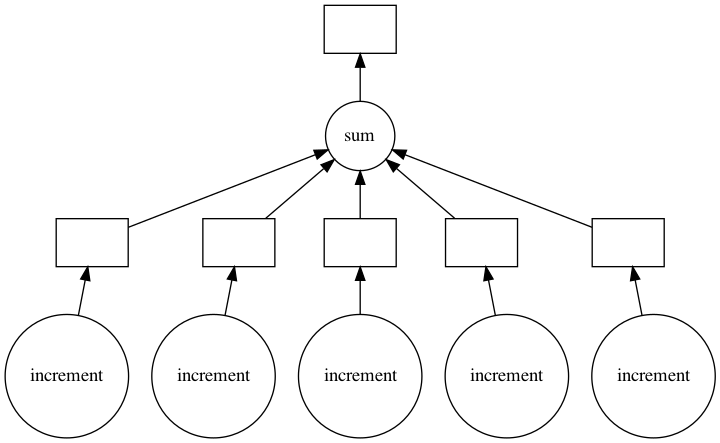

In [19]:
data = [1, 2, 3, 4, 5]

# compile first layer and visualize
layer1 = [delayed(increment)(i) for i in data]
total1 = delayed(sum)(layer1)
total1.visualize()

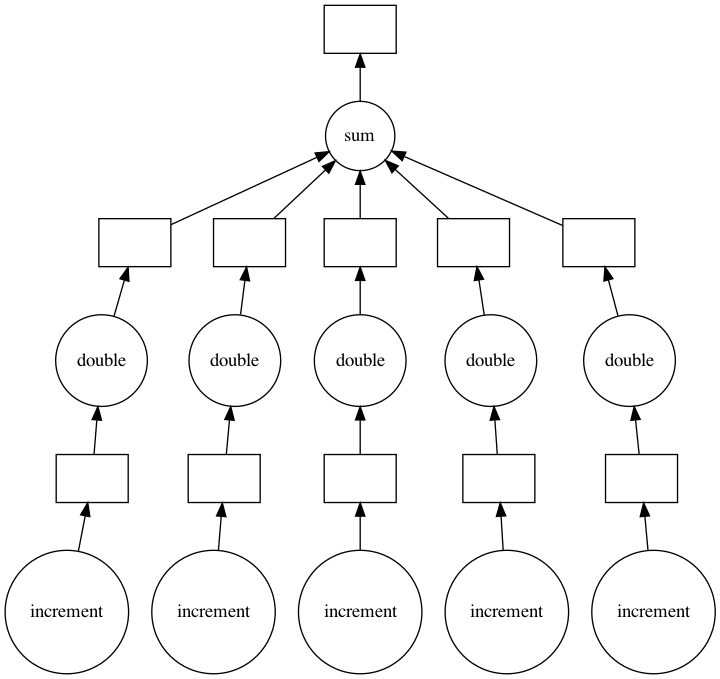

In [20]:
def double(x):
    return x * 2

# compile second layer and visualize
layer2 = [delayed(double)(j) for j in layer1]
total2 = delayed(sum)(layer2)#.persist()
total2.visualize()

In [21]:
z = total2.compute()
z

40

**note that**
- _built in function_
- _persistent_ using .persist() and it will be represented as a rectangle in the graph

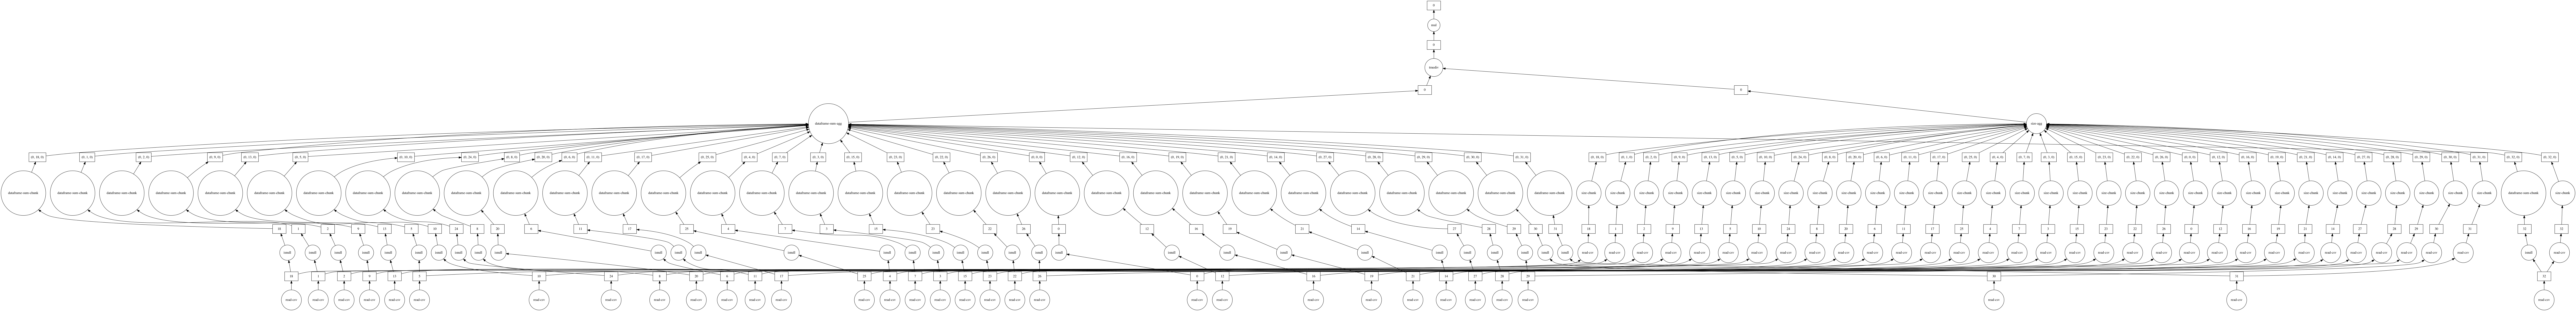

In [22]:
## TASK
# visualize DAGs built from the DataFrame 
missing_count.visualize()

#### Want to know more?
- [Parallelize non DataFrame code](https://examples.dask.org/delayed.html)

### 2.3 Task scheduling

- Dask performs the so called lazy computations. Remember, until you run the method .compute() all what Dask does is to split the process into smaller logical pieces (which avoid loading all the dataset)
- Even though the process is defined, the number of resources assigned and the place where the results will be stored are note assigned because the scheduler assign them dynamically. This allow to recover from worker failure, network unreliability as well as workers completing the tasks at different speeds.
- Dask uses a central scheduler to orchestrate all this work. It splits the workload among different servers which unlikely they are perfectly assigned the same load, power or access to data. Due to these conditions, scheduler needs to promptly react to avoid bottlenecks that will affect overall runtime.
- For best performance, a Dask cluster should use a distributed file system (S3, HDFS) to back its data storage. Assuming there are two nodes like in the image below and data are stored in one. In order to perform computation in the other node we have to move the data from one to the other creating an overhead proportional to the size of the data. The remedy is to split data minimizing the number of data to broadcast across different local machines. 

<img src=IMG/Dask_local_disks.PNG width="480">
<br>

Local disk from **Data Science with Python and Dask**

- Dask scheduler takes data locality into consideration when deciding where to perform computation.

### 2.4 Review Part 2

- The beauty of this code is that you can reuse in one machine or a thousand
- Similar syntax helps transition from Pandas to Dask (good in general for refactoring your code)
- Dask DataFrames is a tool to parallelize computing done popular Pandas that allow to clean and ananlyze large dataset
- Dask parallize Pandas Dataframe and more in general work using DAGs
- Computation are structured by the task scheduler using DAGs
- Computation are constructed lazily and then compute the method
- Use visualize method for a visual representation
- Computation can persist in memory avoid slowdown to replicate result
- Data locality help minimizing network and IO latency

## Part 3: Exercise with DASK

### 3.1 Learn how to manipulate structured data
- Build a Dask DataFrame from a Pandas DataFrame

In [23]:
# create lists with actions
action_IDs = [i for i in range(0,10)]
action_description = ['Clean dish', 'Dress up', 'Wash clothes','Take shower','Groceries','Take shower','Dress up','Gym','Take shower','Movie']
action_date = ['2020-1-16', '2020-1-16', '2020-1-16', '2020-1-16', '2020-1-16', '2020-1-17', '2020-1-17', '2020-1-17', '2020-1-17', '2020-1-17']

# store list into Pandas DataFrame
action_pandas_df = pd.DataFrame({'Action ID': action_IDs, 
                                 'Action Description': action_description, 
                                 'Date': action_date},
                                 columns=['Action ID', 'Action Description', 'Date'])
action_pandas_df

,Action ID,Action Description,Date
0,0,Clean dish,2020-1-16
1,1,Dress up,2020-1-16
2,2,Wash clothes,2020-1-16
3,3,Take shower,2020-1-16
4,4,Groceries,2020-1-16
5,5,Take shower,2020-1-17
6,6,Dress up,2020-1-17
7,7,Gym,2020-1-17
8,8,Take shower,2020-1-17
9,9,Movie,2020-1-17


In [24]:
# convert Pandas DataFrame to a Dask DataFrame
action_dask_df = dd.from_pandas(action_pandas_df, npartitions=3)

In [25]:
action_dask_df

,Action ID,Action Description,Date
npartitions=3,,,
0,int64,object,object
4,...,...,...
8,...,...,...
9,...,...,...


In [26]:
# info Dask Dataframe
print('<index where df has been split>', action_dask_df.divisions)
print('<# partitions>', action_dask_df.npartitions)

<index where df has been split> (0, 4, 8, 9)
<# partitions> 3


In [27]:
# count rows per partition
action_dask_df.map_partitions(len).compute()

0    4
1    4
2    2
dtype: int64

In [28]:
# filter entries in dask dataframe
print('\n <number of entries in each partition after filtering>')
action_filtered = action_dask_df[action_dask_df['Action Description'] != 'Take shower']
print(action_filtered.map_partitions(len).compute())

print('\n <double check number of entries after reorganizing dataframe in one partition>')
action_filtered_reduced = action_filtered.repartition(npartitions=1)
print(action_filtered_reduced.map_partitions(len).compute())


 <number of entries in each partition after filtering>
0    3
1    3
2    1
dtype: int64

 <double check number of entries after reorganizing dataframe in one partition>
0    7
dtype: int64


### 3.2 Summary part 3 and dask limitations

- dataframe are immutable. Functions such as pop and insert are not supported
- does not allow for functions with a lot of shuffeling like stack/unstack and melt
- limit this operations after major filter and preprocessing
- join, merge, groupby, and rolling are supported but expensive due to shuffeling
- reset index starts sequential counting for each partitions
- apply and iterrow are known to be inefficient in Pandas, the same for Dask
- use .division() to inspect how DataFrame has been partitioned
- for best performance partitions should be rougly equal. Use .repartition() method to balance across datasets
- for best performance sort by logical columns, partition by index and index should be presorted